In [329]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine

In [269]:
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df['WineType'] = [wine.target_names[typ] for typ in wine.target]

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [270]:
avg_wine_df = wine_df.groupby('WineType').mean().reset_index()
avg_wine_df

,WineType,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,class_0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,class_1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,class_2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [271]:
wine_count_df = wine_df.groupby('WineType')[['alcohol']].count().rename(columns={'alcohol': 'count'}).reset_index()

In [272]:
wine_count_df

,WineType,count
0,class_0,59
1,class_1,71
2,class_2,48


In [273]:
stack_df = wine_df.groupby('WineType')[['alcohol', 'malic_acid', 'ash', 'flavanoids']].mean().rename(columns = {'alcohol': 'Alcohol', 'malic_acid': 'Malic Acid','ash': 'Ash', 'flavanoids': 'Flavanoids'})

# Layout 1: Subplot() and add_subplot() methods.

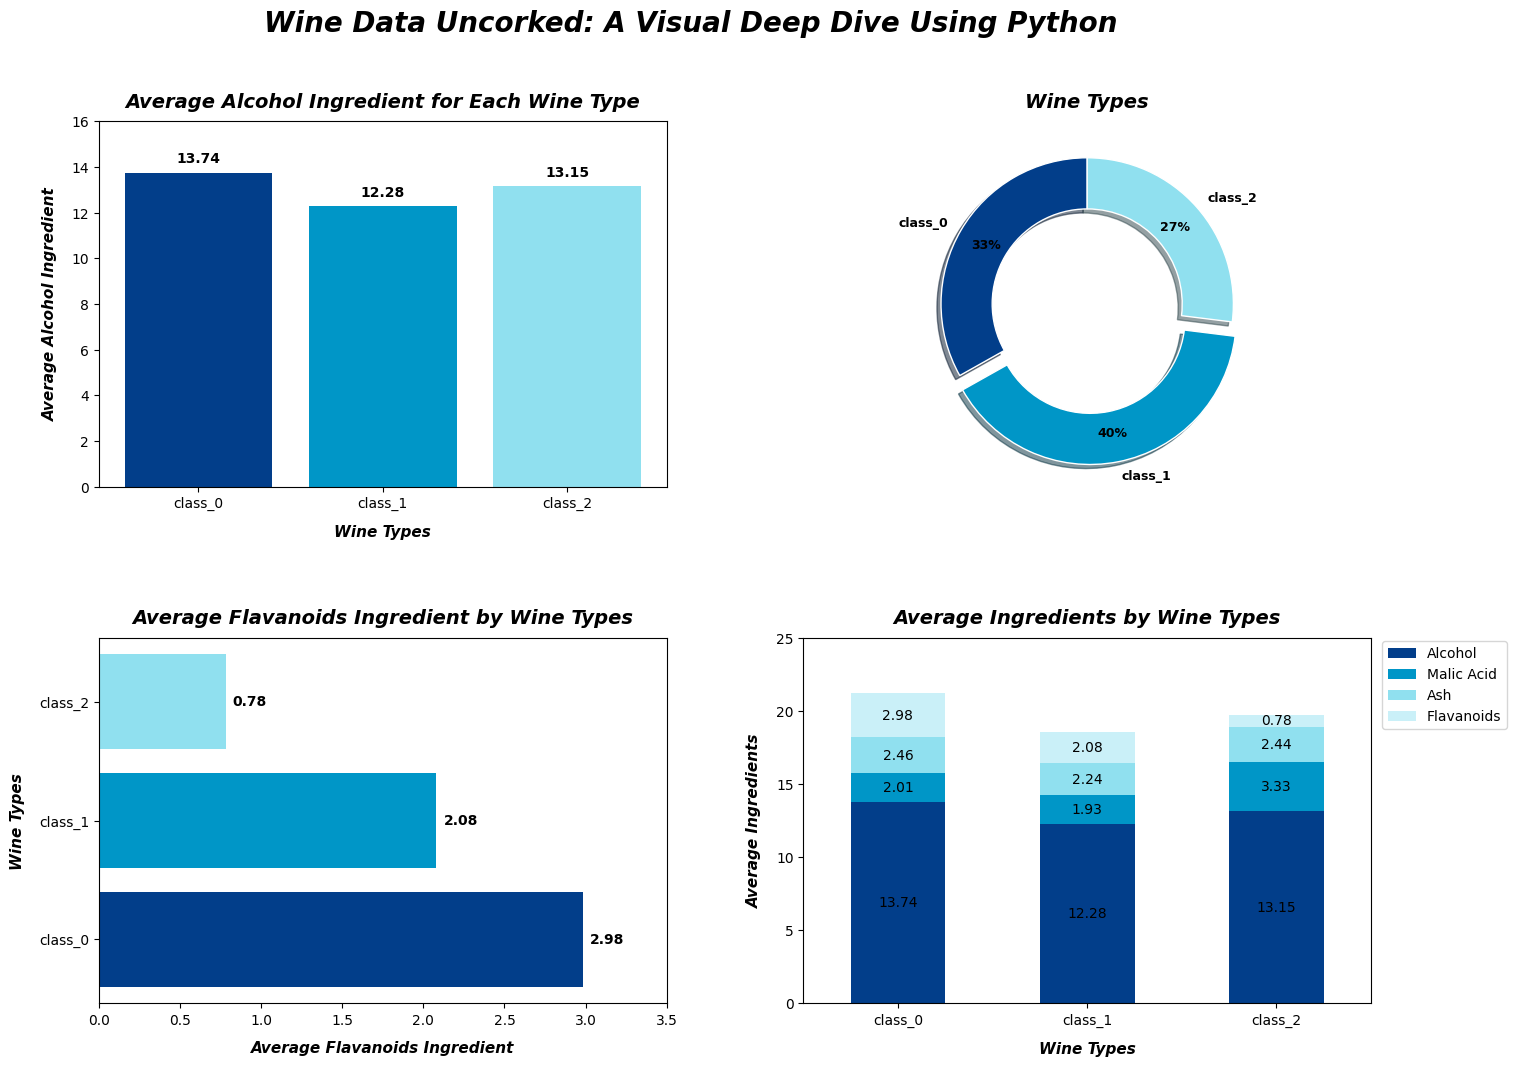

In [327]:
fig = plt.figure(figsize = (15, 12), dpi = 100)

fig.suptitle(
    'Wine Data Uncorked: A Visual Deep Dive Using Python',
    y = 0.93,
    fontsize = 20, fontweight = 'bold',
    fontdict = dict(fontstyle = 'italic')
)


ax1 = plt.subplot(2, 2, 1)    # First argument is row, second argument is column and the 3rd argument is for the chart number.
plt.bar(x = avg_wine_df['WineType'], height = avg_wine_df['alcohol'], color = ['#023e8a', '#0096c7', '#90e0ef'])
for bar in ax1.containers:
    ax1.bar_label(bar, fmt = '{:,.2f}', padding = 5, fontweight = 'bold')

ax1.set_title('Average Alcohol Ingredient for Each Wine Type', fontsize = 14, weight = 'bold', fontdict = dict(fontstyle = 'italic'), pad = 10)
ax1.set_xlabel('Wine Types', fontsize = 11, weight = 'bold', fontdict = dict(fontstyle = 'italic'), labelpad = 10)
ax1.set_ylabel('Average Alcohol Ingredient', fontsize = 11, weight = 'bold', fontdict = dict(fontstyle = 'italic'), labelpad = 10)
ax1.set_ylim(0,16)

ax2 = plt.subplot(2, 2, 2)
ax2.pie(
    wine_count_df['count'],
    colors = ['#023e8a', '#0096c7', '#90e0ef'],
    explode = [0, 0.1, 0],
    labels = wine_count_df['WineType'],
    shadow = True,
    autopct = '%.0f%%',
    wedgeprops = dict(width = 0.35, edgecolor = 'w'),
    textprops= dict(fontsize = 9, fontweight = 'bold'),
    pctdistance = 0.8,
    startangle = 90
)

ax2.set_title('Wine Types', fontsize = 14, fontweight = 'bold', fontdict = dict(fontstyle = 'italic'), pad = 10)

ax3 = plt.subplot(2, 2, 3)
ax3.barh(avg_wine_df['WineType'], avg_wine_df['flavanoids'], color = ['#023e8a', '#0096c7', '#90e0ef'])

for bar in ax3.containers:
    ax3.bar_label(bar, padding = 5, fmt = "{:,.2f}", fontweight = 'bold')

ax3.set_xlim(0, 3.5)
ax3.set_title('Average Flavanoids Ingredient by Wine Types', fontsize = 14, fontweight = 'bold', fontdict = dict(fontstyle = 'italic'), pad = 10)
ax3.set_ylabel('Wine Types', fontsize = 11, weight = 'bold', fontdict = dict(fontstyle = 'italic'), labelpad = 10)
ax3.set_xlabel('Average Flavanoids Ingredient', fontsize = 11, weight = 'bold', fontdict = dict(fontstyle = 'italic'), labelpad = 10)

ax4 = plt.subplot(2, 2, 4)

stack_df.plot(
    kind = 'bar',
    stacked = True, 
    color = ['#023e8a', '#0096c7', '#90e0ef', '#caf0f8'],
    ax = ax4
)

for bar in ax4.containers:
    ax4.bar_label(bar, fmt = "{:,.2f}", label_type = 'center')

ax4.set_title('Average Ingredients by Wine Types', fontsize = 14, fontweight = 'bold', fontdict = dict(fontstyle = 'italic'), pad = 10)
ax4.set_xlabel('Wine Types', fontsize = 11, weight = 'bold', fontdict = dict(fontstyle = 'italic'), labelpad = 10)
ax4.set_ylabel('Average Ingredients', fontsize = 11, weight = 'bold', fontdict = dict(fontstyle = 'italic'), labelpad = 10)
ax4.set_ylim(0,25)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 0)

plt.tight_layout(pad = 5, h_pad = 5, w_pad = 5)
plt.legend(loc = (1.02, 0.75))

plt.savefig('Wine_Date_Uncorked.png');
